In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from kan.KAN import *

def count_parameters(model):
                return sum(p.numel() for p in model.parameters() if p.requires_grad)



In [42]:
df = pd.read_csv('insurance.csv')

df = pd.get_dummies(df, columns=['region'], dtype=int)
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['sex'] = df['sex'].map({'male':1, 'female':0})

X, y = df.drop('charges', axis=1), df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
X_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
621,37,1,34.100,4,1,0,0,0,1
194,18,1,34.430,0,0,0,0,1,0
240,23,0,36.670,2,1,1,0,0,0
1168,32,1,35.200,2,0,0,0,0,1
1192,58,0,32.395,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
763,27,1,26.030,0,0,1,0,0,0
835,42,1,35.970,2,0,0,0,1,0
1216,40,1,25.080,0,0,0,0,1,0
559,19,1,35.530,0,0,0,1,0,0


In [49]:
model = KAN([len(X_train.columns), 1,1], grid=100, k=3)
print(f"KAN parameters: {count_parameters(model)}")
# Prepare the dataset dictionary
dataset = {
    'train_input': torch.tensor(X_train.values, dtype=torch.float64),
    'train_label': torch.tensor(y_train.values, dtype=torch.float64),
    'test_input': torch.tensor(X_val.values, dtype=torch.float64),
    'test_label': torch.tensor(y_val.values, dtype=torch.float64)
}


results = model.train(dataset, steps=20, lr=0.1, )

KAN parameters: 1092


train loss: 1.20e+04 | test loss: 1.26e+04 | lr: 1.00e-05 : 100%|███████████████████████████████████████████| 20/20 [01:14<00:00,  3.74s/it]


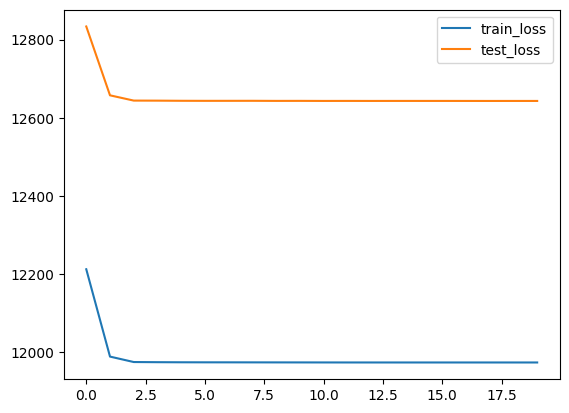

In [45]:
plt.plot(results['train_loss'], label='train_loss')
plt.plot(results['test_loss'], label='test_loss')
plt.legend()
plt.show()

In [46]:

test_dataset = {
    'test_input': torch.tensor(X_test.values, dtype=torch.float64),
    'test_label': torch.tensor(y_test.values, dtype=torch.float64)
}


y_pred = model(test_dataset['test_input']).detach().numpy()
y_true = test_dataset['test_label'].numpy()
RMSE = np.sqrt(np.mean((y_pred - y_true)**2))
MSE = np.mean((y_pred - y_true)**2)
R2 = 1 - np.sum((y_pred - y_true)**2) / np.sum((y_true - np.mean(y_true))**2)
print(f"RMSE: {RMSE}")
print(f"MSE: {MSE}")
print(f"R2: {R2}")

RMSE: 12595.865849559721
MSE: 158655836.50010484
R2: -133.746236502704


In [47]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
RMSE = np.sqrt(np.mean((y_pred - y_true)**2))
MSE = np.mean((y_pred - y_true)**2)
R2 = 1 - np.sum((y_pred - y_true)**2) / np.sum((y_true - np.mean(y_true))**2)
print(f"RMSE: {RMSE}")
print(f"MSE: {MSE}")
print(f"R2: {R2}")


RMSE: 5197.032078025211
MSE: 27009142.42002305
R2: 0.8288146530313119
